In [1]:
import sys
import sklearn
import scipy
import pandas as pds
import matplotlib.pyplot as plts
import seaborn as sea
sea.set(color_codes=True)

In [2]:
credit_card_df = pds.read_csv('creditcard.csv')

In [3]:
print(credit_card_df.columns)
print(credit_card_df.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


In [4]:
print(credit_card_df.describe)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -

In [5]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
sample_df = credit_card_df.sample(frac =0.1,random_state=1)
print(credit_card_df.describe().T)

         count          mean           std         min           25%  \
Time    2848.0  95248.251053  47644.314961  128.000000  54624.250000   
V1      2848.0      0.011750      2.063431  -40.470142     -0.887886   
V2      2848.0     -0.039351      1.844449  -39.818310     -0.620759   
V3      2848.0      0.018920      1.485247  -17.474421     -0.854662   
V4      2848.0      0.007964      1.410786   -4.459901     -0.783289   
V5      2848.0     -0.024247      1.509010  -25.791132     -0.665512   
V6      2848.0      0.030677      1.405890  -19.996349     -0.762110   
V7      2848.0      0.033694      1.314645  -19.083907     -0.552919   
V8      2848.0      0.029033      1.143569  -31.876732     -0.183074   
V9      2848.0      0.016412      1.068758   -4.622730     -0.604934   
V10     2848.0     -0.014399      1.020139   -8.409665     -0.536375   
V11     2848.0      0.001353      1.009518   -4.010268     -0.751806   
V12     2848.0      0.019707      0.958356   -8.576761     -0.37

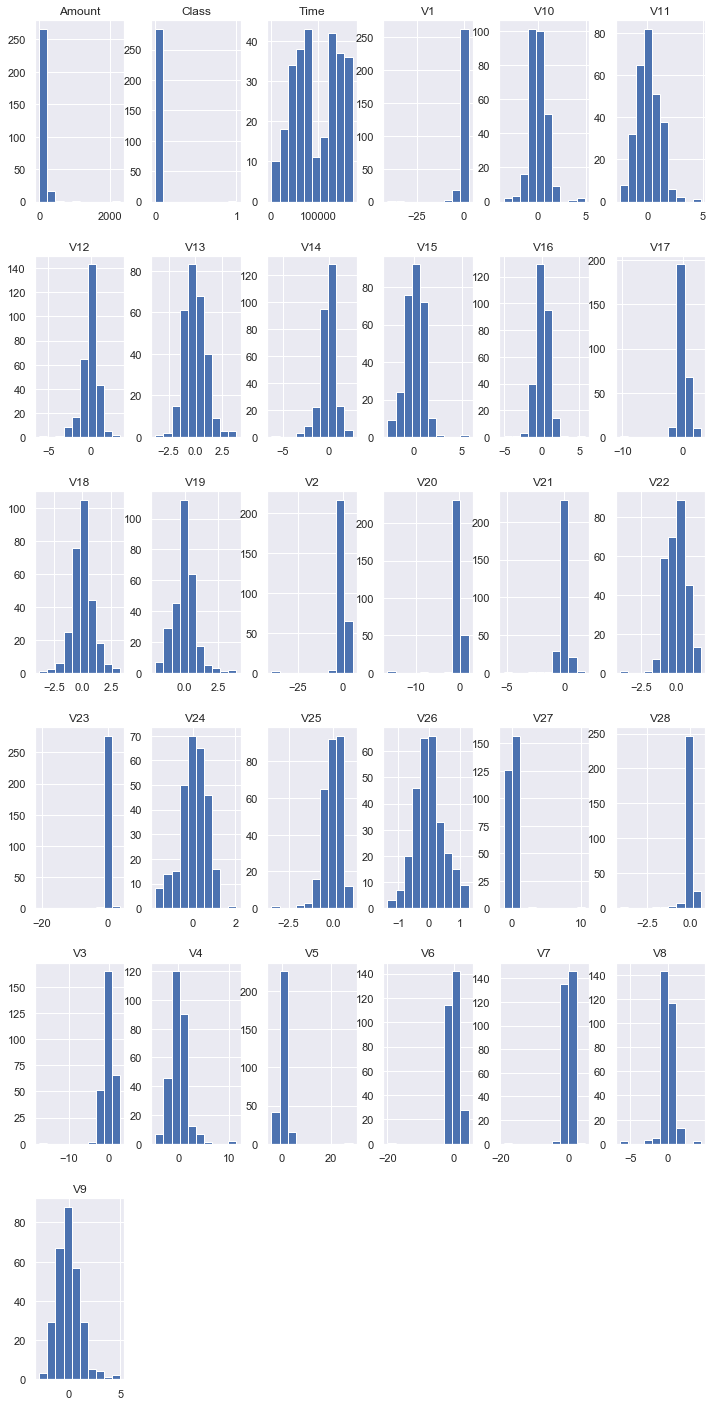

In [11]:
sample_df.hist(figsize=(12,25))
plts.show()

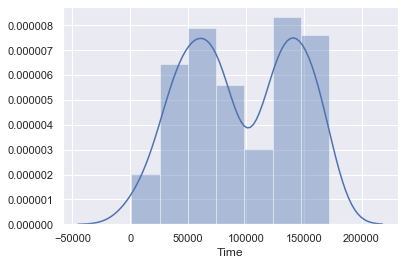

In [12]:
sea.distplot(sample_df['Time'])

In [13]:
fraud = sample_df[sample_df['Class']==1]
valid = sample_df[sample_df['Class']==0]

outlier_fract = (float)(len(fraud))/len(valid)

print(outlier_fract)

print('Fraud cases: {}'.format(len(fraud)))

print('Valid cases: {}'.format(len(valid)))


0.0035211267605633804
Fraud cases: 1
Valid cases: 284


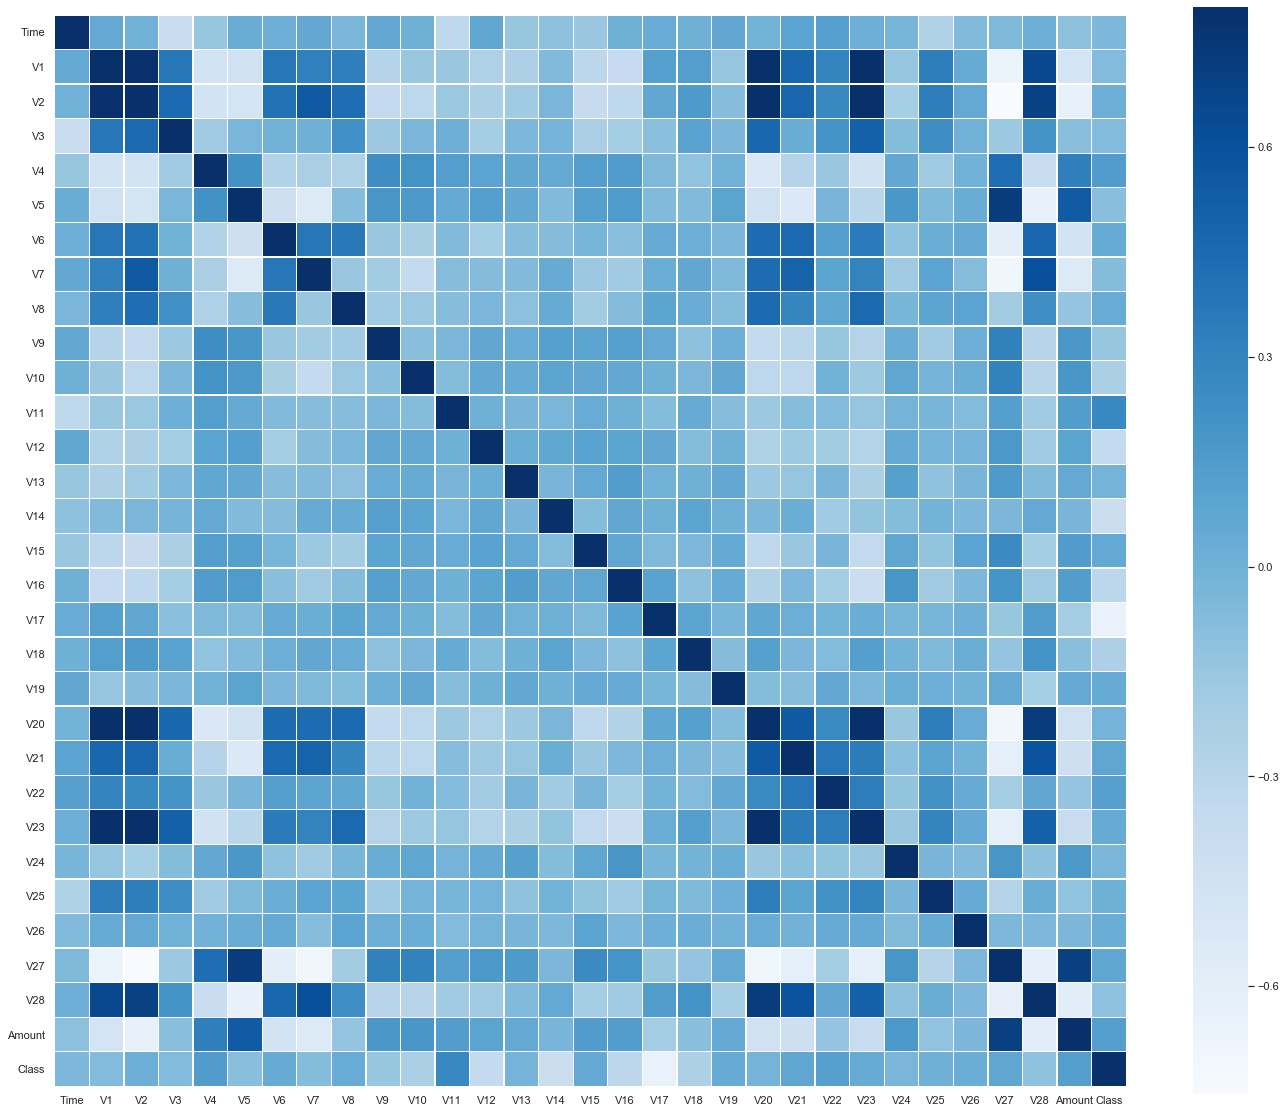

In [14]:
corr_matrix = sample_df.corr() #to see strong correlation in the data
sea.color_palette("bright")
fig = plts.figure(figsize = (24, 20))
sea.heatmap(corr_matrix, vmax = 0.8, square = True, cmap="Blues", linewidths=0.3)

In [15]:
df_coloumns = sample_df.columns.tolist()

df_coloumns = [i for i in df_coloumns if i not in ['Class']] #to remove data we don't want
target = 'Class'
X = sample_df[df_coloumns]
Y = sample_df[target]

print(X.shape)
print(Y.shape)



(285, 30)
(285,)


In [16]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.ensemble import IsolationForest  as IsolFor
from sklearn.neighbors import LocalOutlierFactor as LocOutFac


In [17]:
state = 1 #random state

# define the outlier definition methods
classifiers = {
    "Isolation Forest": IsolFor(max_samples=len(
        X),
                                       contamination = outlier_fract,
                                       random_state = state),
    "Local Outlier Factor": LocOutFac(n_neighbors = 20,
                                               contamination = outlier_fract)
}


In [18]:
for j, (clsfr_name, clsfr) in enumerate(classifiers.items()):
    if clsfr_name == "Local Outlier Factor":
        ypred = clsfr.fit_predict(X)
        scores_pred = clsfr.negative_outlier_factor_
    else:
        clsfr.fit(X)
        scores_pred = clsfr.decision_function(X)
        ypred = clsfr.predict(X)
        
    ypred[ypred == 1] = 0
    ypred[ypred == -1] = 1
    
    no_errors = (ypred != Y).sum()
    
    print('{} : {}'.format(clsfr_name, no_errors))
    
    print(accuracy_score(Y,ypred))
    print(classification_report(Y,ypred))


c:\users\divya soni\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Isolation Forest : 2
0.9929824561403509
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       0.00      0.00      0.00         1

    accuracy                           0.99       285
   macro avg       0.50      0.50      0.50       285
weighted avg       0.99      0.99      0.99       285

Local Outlier Factor : 2
0.9929824561403509
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       0.00      0.00      0.00         1

    accuracy                           0.99       285
   macro avg       0.50      0.50      0.50       285
weighted avg       0.99      0.99      0.99       285



c:\users\divya soni\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
